In [18]:
import feather
import scanpy as sc
import numpy as np
import scanpy as sc
import pandas as pd
from anndata import AnnData


In [19]:
all_cells_path = '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/all_cells.feather'
all_cells_df =  feather.read_dataframe(all_cells_path)

In [20]:
annot_path = "/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/all_cells_annotation.feather"
annot_df = feather.read_dataframe(annot_path)

In [21]:
singlets = annot_df["doublet_score"].values<0.7

In [22]:
singlets_df = all_cells_df.loc[singlets,:]
singlets_annot = annot_df.loc[singlets,:]

In [23]:
bin_df = singlets_df>0

In [24]:
num_genes = np.sum(bin_df,axis=1)

In [25]:
qc_df = singlets_df.loc[num_genes>2500,:]
qc_annot = singlets_annot.loc[num_genes>2500,:]

In [26]:
striatum_ann = AnnData(qc_df)

Transforming to str index.


In [27]:
striatum_ann.var_names = all_cells_df.columns.values
striatum_ann.obs_names = qc_annot["full_id"]

In [28]:
for col in annot_df.columns.values:
    striatum_ann.obs[col] = pd.Categorical(qc_annot[col].values, categories=np.unique(qc_annot[col].values))

In [29]:
striatum_ann.obs["doublet_score"] = pd.Series(np.log(qc_annot["doublet_score"].values))

In [30]:
sc.pp.normalize_per_cell(striatum_ann, counts_per_cell_after=1e6)
sc.pp.log1p(striatum_ann)
sc.pp.neighbors(striatum_ann)
sc.tl.leiden(striatum_ann, key_added='groups')

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [50]:
sc.pp.filter_genes(striatum_ann,min_cells=5)

In [51]:
sc.pp.highly_variable_genes(striatum_ann,n_top_genes=4000)

ValueError: cannot specify integer `bins` when input data contains infinity

In [41]:
sc.pp.normalize_total(striatum_ann)

In [ ]:
sc.pp.neighbors(striatum_ann)

In [74]:
sc.tl.umap(striatum_ann)

In [31]:
sc.tl.leiden(striatum_ann)

In [18]:
np.unique(striatum_ann.obs["leiden"].values)

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [32]:
qc_annot["pre_cluster"] = striatum_ann.obs["leiden"].values.copy()

/home/mkleyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
sc.tl.umap(striatum_ann)

In [17]:
qc_cells_path = '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/qc_cells.feather'
feather.write_dataframe(qc_df,qc_cells_path)
qc_annot_path =  '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/qc_annot_4.feather'
feather.write_dataframe(qc_annot,qc_annot_path)




In [33]:
qc_annot_path =  '/pylon5/mc5pijp/mkleyman/data/fiona_rhemac10/processed/full/qc_annot_4.feather'
feather.write_dataframe(qc_annot,qc_annot_path)

In [19]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

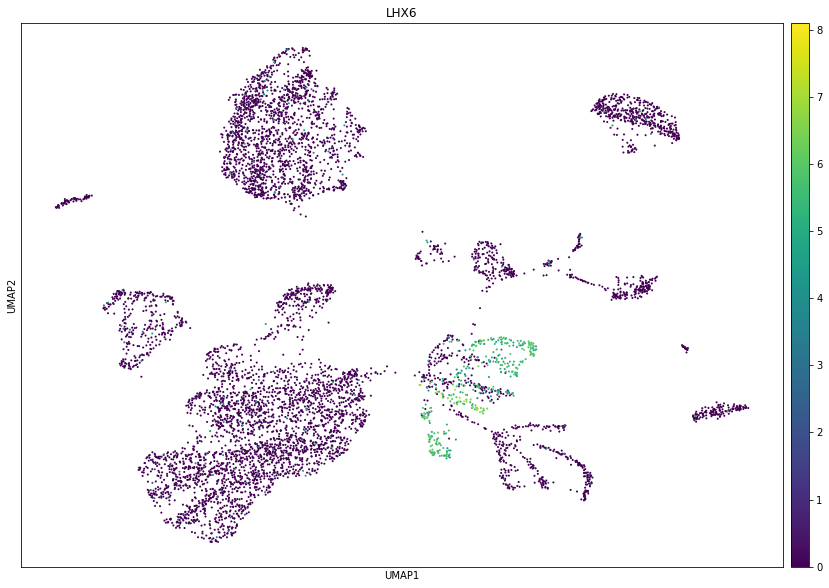

In [75]:
sc.pl.umap(striatum_ann,color="LHX6")

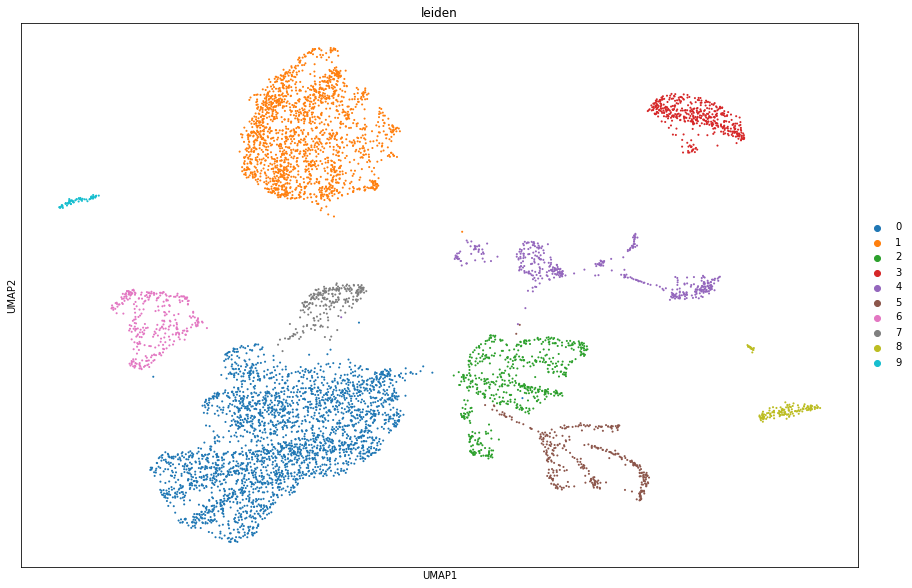

In [80]:
sc.pl.umap(striatum_ann,color="leiden")

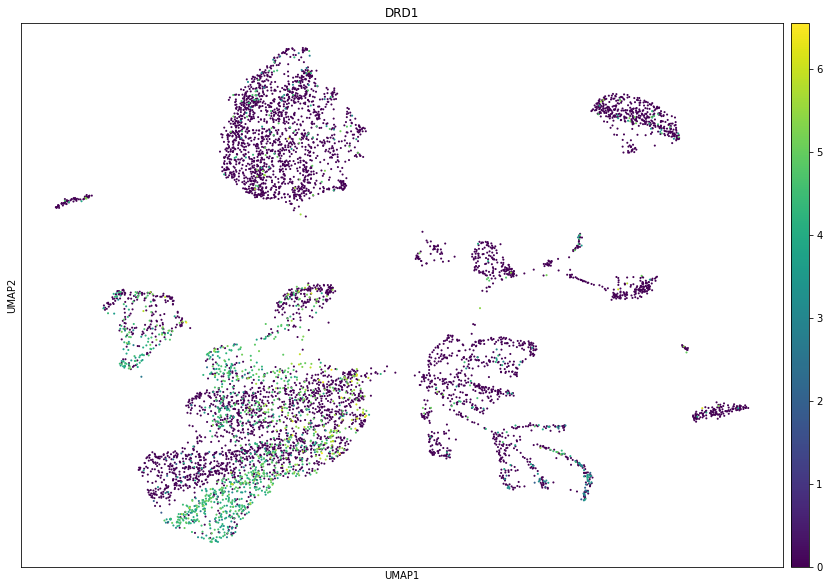

In [77]:
sc.pl.umap(striatum_ann,color="DRD1")

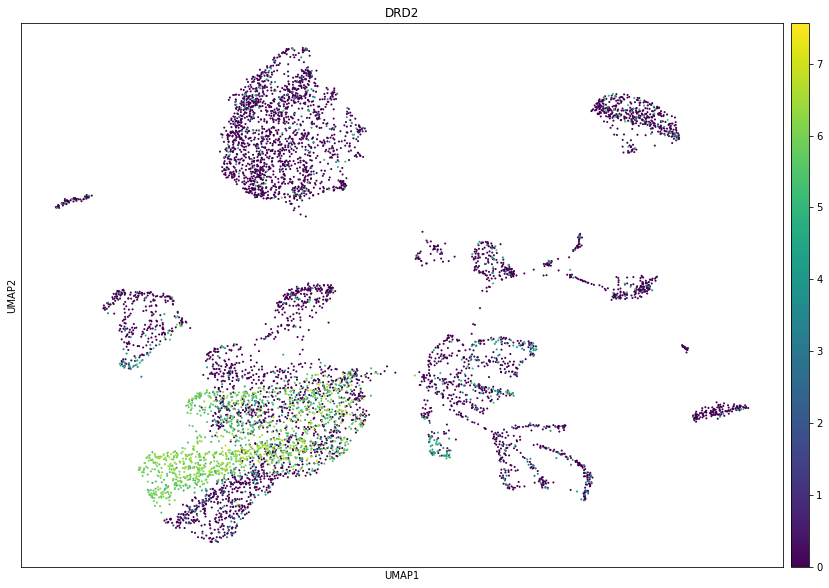

In [78]:
sc.pl.umap(striatum_ann,color="DRD2")

In [52]:
np.sum(all_cells_df["DRD1"]>0.0)

1817

In [53]:
np.sum(all_cells_df["DRD2"]>0.0)

2368

In [54]:
np.sum(np.logical_and(all_cells_df["DRD1"]>0.0,all_cells_df["DRD2"]>0.0))

352

In [42]:
bin_df = all_cells_df>0

In [43]:
num_genes = np.sum(bin_df,axis=1)

In [23]:
selected_cells = all_cells_df

In [56]:
np.sum(selected_cells["DRD1"]>0.0)

1817

In [57]:
np.sum(selected_cells["DRD2"]>0.0)

2368

In [58]:
np.sum(np.logical_and(selected_cells["DRD1"]>0.0,selected_cells["DRD2"]>0.0))

352

In [11]:
from matplotlib import pyplot as plt 


(array([2.164e+03, 2.629e+03, 1.709e+03, 1.155e+03, 6.690e+02, 2.890e+02,
        6.500e+01, 1.600e+01, 1.000e+00, 3.000e+00]),
 array([ 1849. ,  3167.5,  4486. ,  5804.5,  7123. ,  8441.5,  9760. ,
        11078.5, 12397. , 13715.5, 15034. ]),
 <a list of 10 Patch objects>)

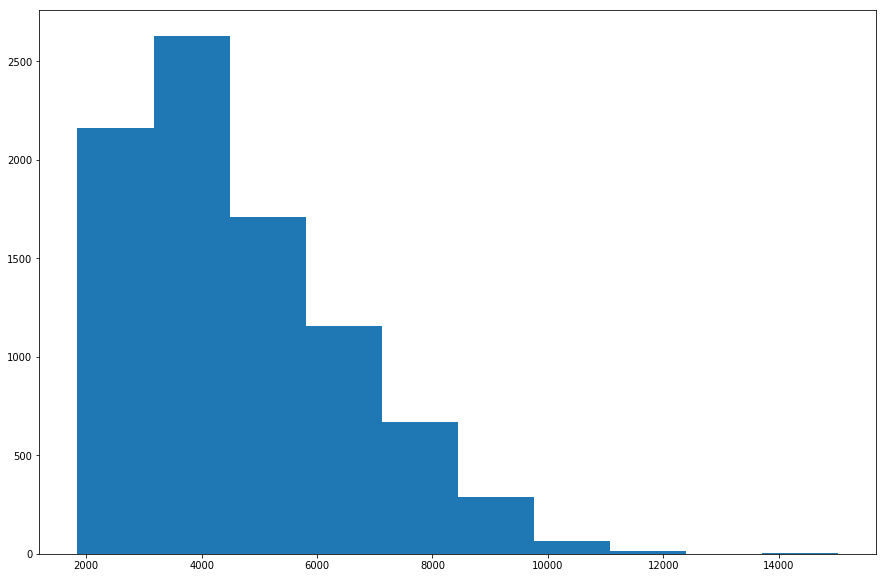

In [63]:
plt.hist(np.sum(bin_df,axis=1))

In [61]:
thresholds = []
drd12_cells = []
drd12_percent = []
x = 0.95
while x>0.05:
    threshold = np.quantile(numis,x)
    thresholds.append(threshold)
    selected_cells = all_cells_df.loc[singlets,:].loc[numis<threshold,:]
    drd12 = np.sum(np.logical_and(selected_cells["DRD1"]>0.0,selected_cells["DRD2"]>0.0))
    drd12_cells.append(drd12)
    drd_total = np.sum(selected_cells["DRD1"]>0.0)+np.sum(selected_cells["DRD2"]>0.0)-drd12
    drd12_percent.append(drd12/drd_total)
    x-=0.05
    
    

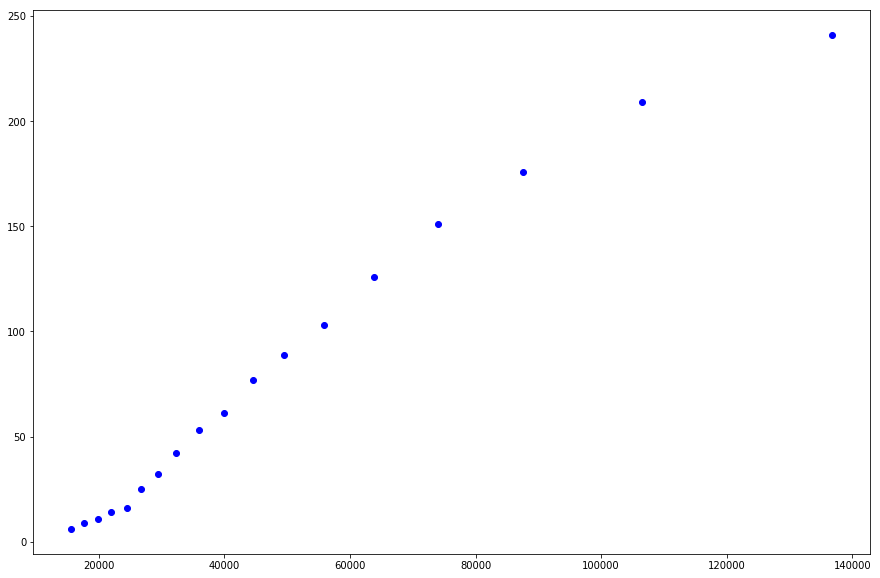

In [62]:
plt.plot(thresholds,drd12_cells,"bo")

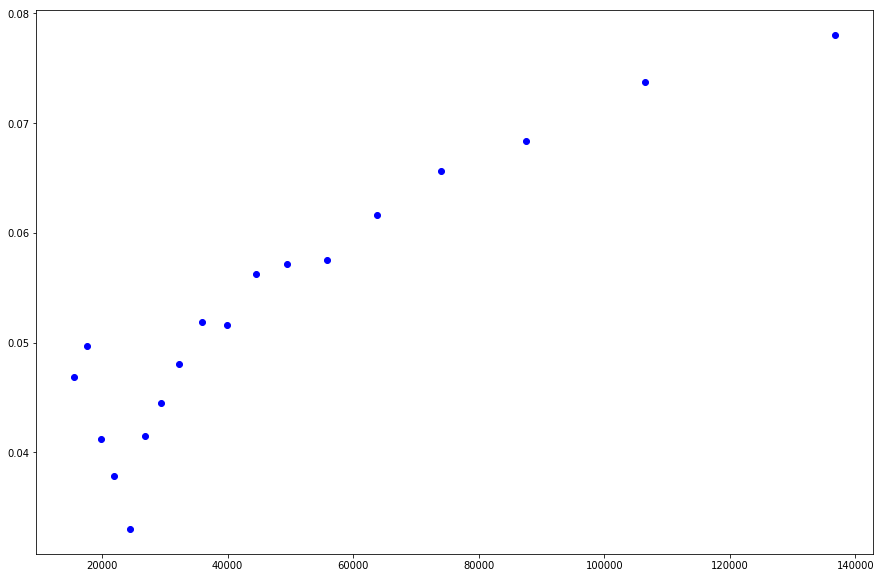

In [63]:
plt.plot(thresholds,drd12_percent,"bo")

In [49]:
singlets = annot_df["doublet_score"].values<0.7

In [50]:
np.sum(singlets)

7784

In [51]:
annot_df.shape

(8700, 5)

In [44]:
numis = np.sum(all_cells_df,axis=1)


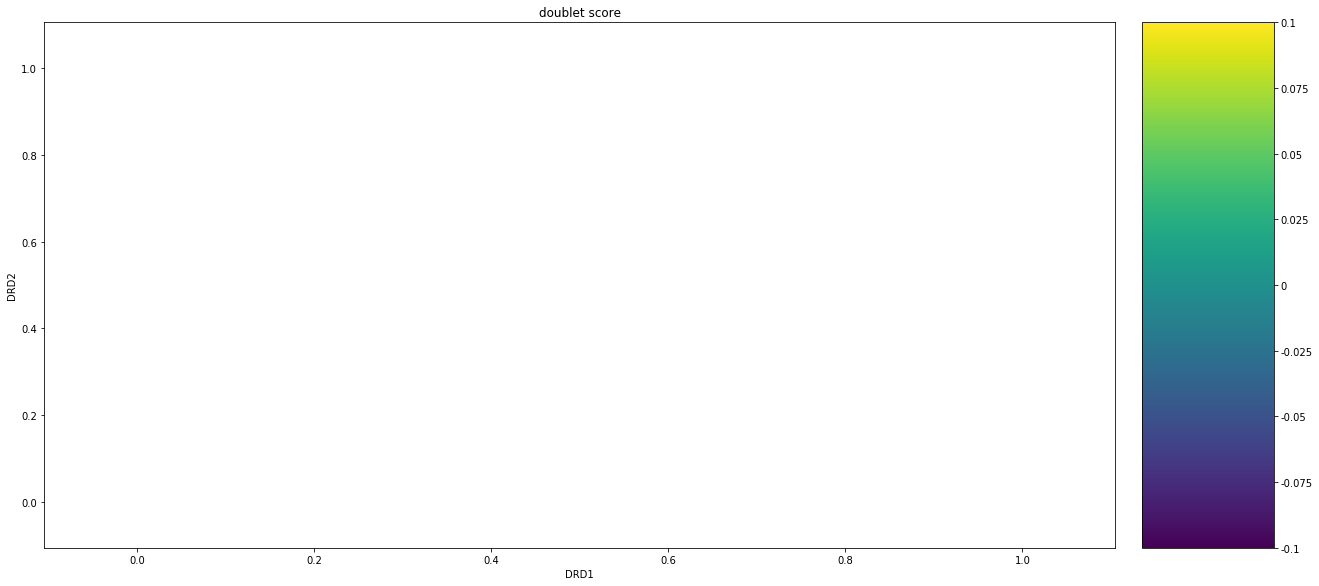

In [29]:
sc.pl.scatter(striatum_ann,x="DRD1",y="DRD2",color="doublet_score")

In [26]:
from collections import Counter
Counter(annot_df["region"][np.logical_and(selected_cells["DRD1"]>0.0,selected_cells["DRD2"]>0.0)].values)

Counter({'caudate': 117, 'putamen': 144, 'nacc': 91})

In [52]:
from plotnine import ggplot,aes,geom_point,theme_classic,geom_density_2d

In [40]:
all_cells_plot =  pd.concat([all_cells_norm,annot_df],axis=1)

/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/mkleyman/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


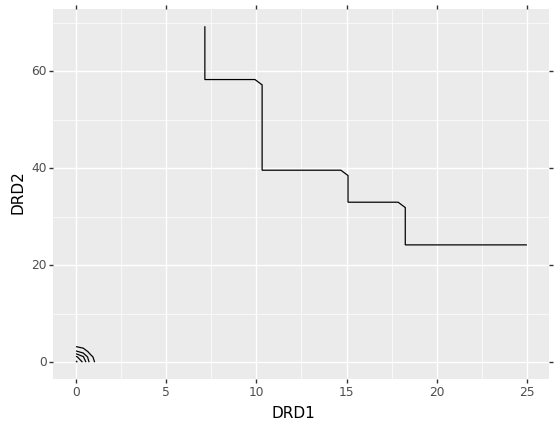

<ggplot: (-9223363444376512007)>

In [54]:
ggplot(all_cells_plot,aes(x="DRD1",y="DRD2"))+geom_density_2d()

In [39]:
all_cells_norm = pd.DataFrame(striatum_ann.X,columns=all_cells_df.columns.values)

In [45]:
all_cells_plot["ngenes"] =num_genes
all_cells_plot["numis"] =numis